In [ ]:
# Data handling and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature scaling
from sklearn.preprocessing import StandardScaler

# Ignore warnings for clean output
import warnings
warnings.filterwarnings("ignore")

In [ ]:
credit_data = pd.read_csv('/content/creditcard.csv')

# Display basic info
print(credit_data.info())

# Check the first few rows of the data
print(credit_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17985 entries, 0 to 17984
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17985 non-null  int64  
 1   V1      17985 non-null  float64
 2   V2      17985 non-null  float64
 3   V3      17985 non-null  float64
 4   V4      17985 non-null  float64
 5   V5      17985 non-null  float64
 6   V6      17985 non-null  float64
 7   V7      17985 non-null  float64
 8   V8      17985 non-null  float64
 9   V9      17985 non-null  float64
 10  V10     17985 non-null  float64
 11  V11     17985 non-null  float64
 12  V12     17985 non-null  float64
 13  V13     17985 non-null  float64
 14  V14     17985 non-null  float64
 15  V15     17985 non-null  float64
 16  V16     17985 non-null  float64
 17  V17     17985 non-null  float64
 18  V18     17985 non-null  float64
 19  V19     17985 non-null  float64
 20  V20     17985 non-null  float64
 21  V21     17985 non-null  float64
 22

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64


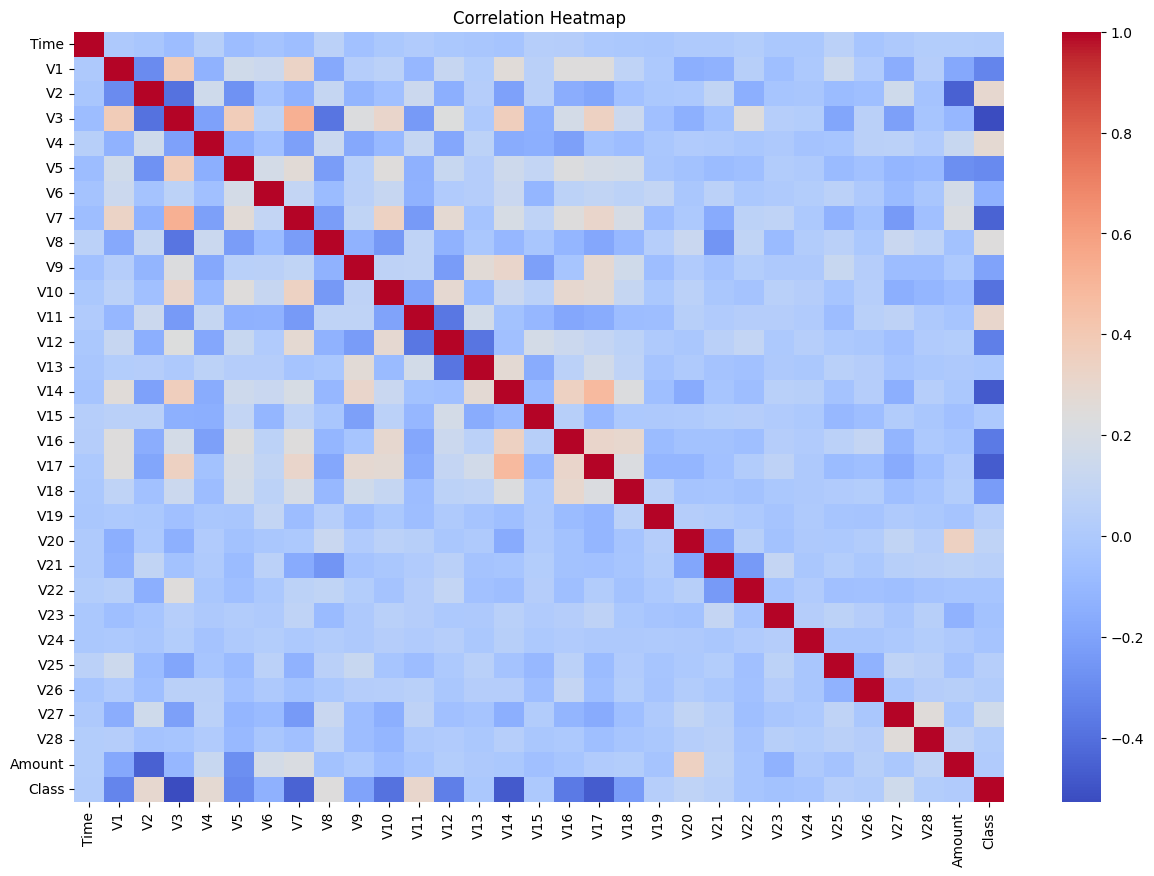

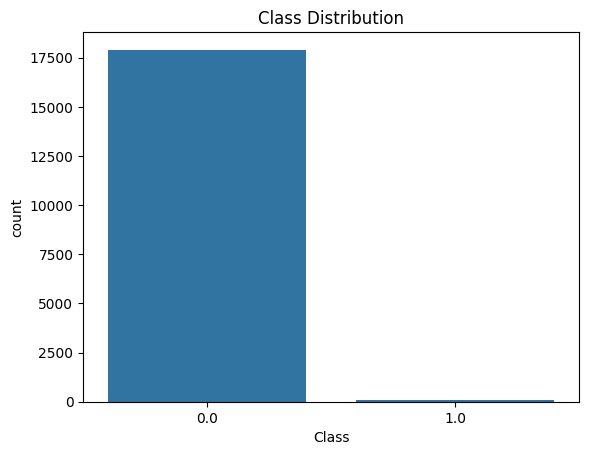

In [ ]:
# Check for missing values
print(credit_data.isnull().sum())

# Plot correlation heatmap to see relationships
plt.figure(figsize=(15, 10))
sns.heatmap(credit_data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# Plot the distribution of classes
sns.countplot(x='Class', data=credit_data)
plt.title('Class Distribution')
plt.show()

In [ ]:
# Separate features (X) and target (Y)
X = credit_data.drop('Class', axis=1)
Y = credit_data['Class']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [ ]:
# Optionally, you can detect and remove outliers using interquartile range (IQR)
Q1 = credit_data.quantile(0.25)
Q3 = credit_data.quantile(0.75)
IQR = Q3 - Q1
credit_data_cleaned = credit_data[~((credit_data < (Q1 - 1.5 * IQR)) | (credit_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)

# Predict using the Decision Tree
Y_pred_dt = dt_classifier.predict(X_test)

# Evaluate Decision Tree performance
print("Decision Tree Accuracy:", accuracy_score(Y_test, Y_pred_dt))
print(classification_report(Y_test, Y_pred_dt))

Decision Tree Accuracy: 0.9983319432860718
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3579
         1.0       0.88      0.78      0.82        18

    accuracy                           1.00      3597
   macro avg       0.94      0.89      0.91      3597
weighted avg       1.00      1.00      1.00      3597



In [ ]:
import numpy as np

# Remove rows where Y_train is NaN
mask = ~np.isnan(Y_train)
X_train = X_train[mask]
Y_train = Y_train[mask]


In [ ]:
# Train a Neural Network (MLP Classifier)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_classifier.fit(X_train, Y_train)

# Predict using the Neural Network
Y_pred_nn = mlp_classifier.predict(X_test)

# Evaluate Neural Network performance
print("Neural Network Accuracy:", accuracy_score(Y_test, Y_pred_nn))
print(classification_report(Y_test, Y_pred_nn))

Neural Network Accuracy: 0.9986099527383931
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3579
         1.0       1.00      0.72      0.84        18

    accuracy                           1.00      3597
   macro avg       1.00      0.86      0.92      3597
weighted avg       1.00      1.00      1.00      3597



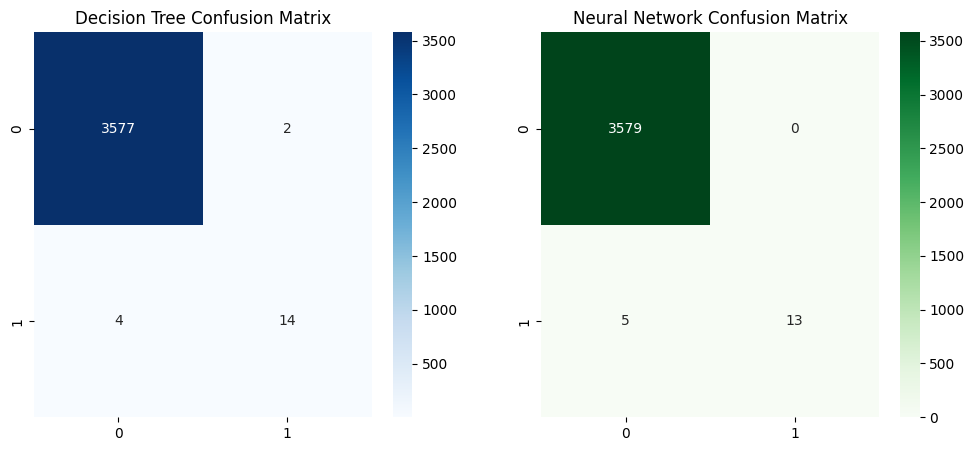

In [ ]:
# Confusion matrix for both models
plt.figure(figsize=(12, 5))

# Decision Tree Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(Y_test, Y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')

# Neural Network Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(Y_test, Y_pred_nn), annot=True, fmt='d', cmap='Greens')
plt.title('Neural Network Confusion Matrix')

plt.show()